In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Bar Plot

In [9]:
xlsx_path = '/Users/baileyng/MIND_data/Cognitive Model Results (Formatted).xlsx'
sheets = pd.read_excel(xlsx_path, sheet_name=None)

In [10]:
model_col = 'Model'
r2_col = 'R-squared'
std_col = 'R-squared (std)'

print(sheets.keys())

dict_keys(['GF', 'PAL', 'DSST', 'TMT'])


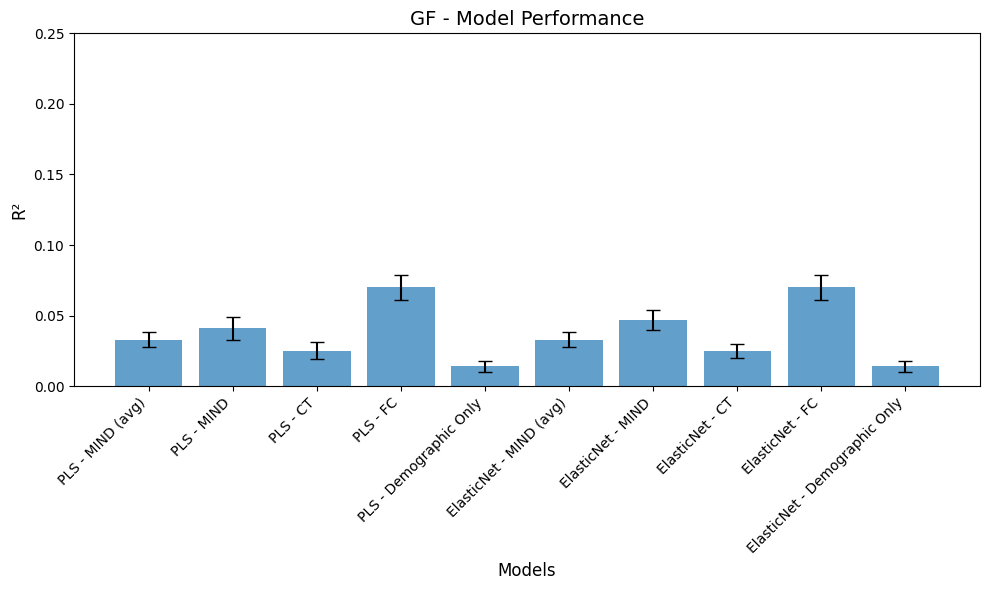

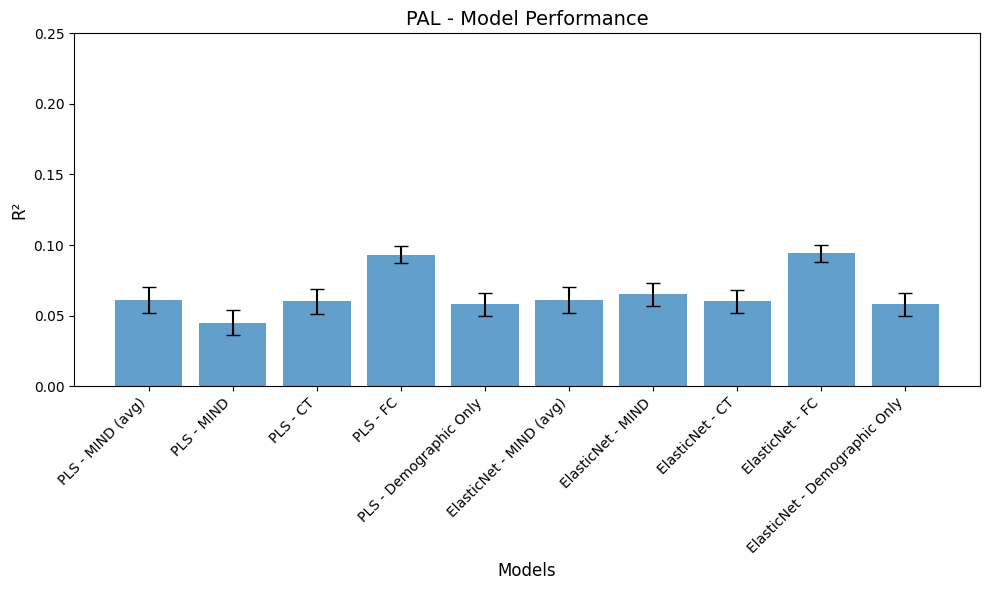

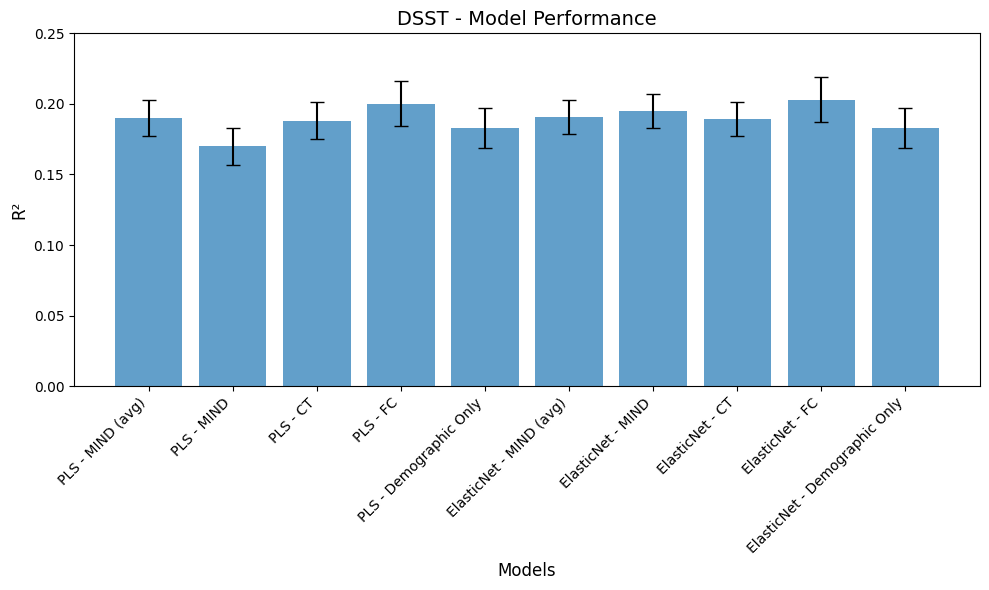

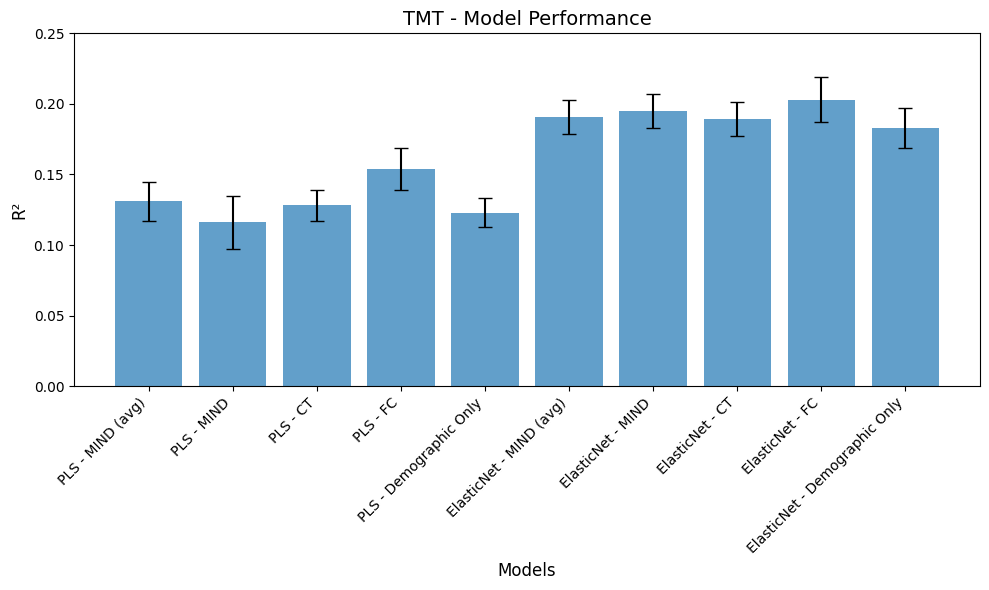

In [11]:
for sheet_name, df in sheets.items():
    plt.figure(figsize=(10, 6))

    models = df[model_col]
    r2_values = df[r2_col]
    r2_std = df[std_col]

    plt.bar(range(len(models)), r2_values, yerr=r2_std, capsize=5, alpha=0.7)
    plt.ylim(0, 0.25)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('R²', fontsize=12)
    plt.title(f'{sheet_name} - Model Performance', fontsize=14)
    plt.xticks(range(len(models)), models, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Line Plot

In [12]:
xlsx_path = '/Users/baileyng/MIND_data/Cognitive Model Results (Formatted) 2.xlsx'
sheets = pd.read_excel(xlsx_path, sheet_name=None)

In [13]:
model_col = 'Model'
data_col = 'Data'
r2_col = 'R-squared'
std_col = 'R-squared (std)'

print(sheets.keys())

dict_keys(['GF', 'PAL', 'DSST', 'TMT'])


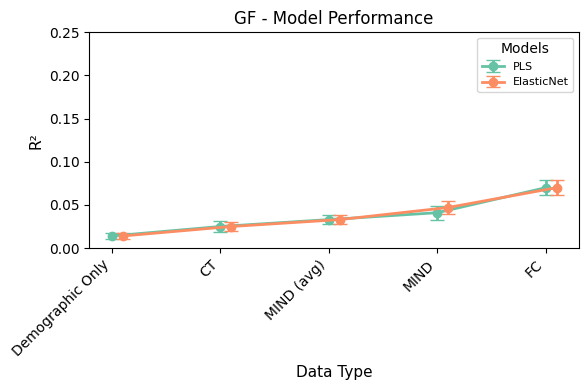

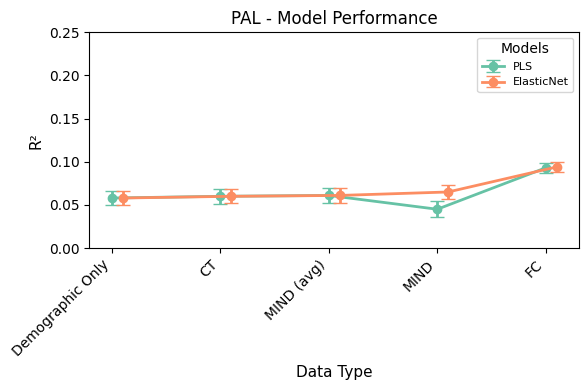

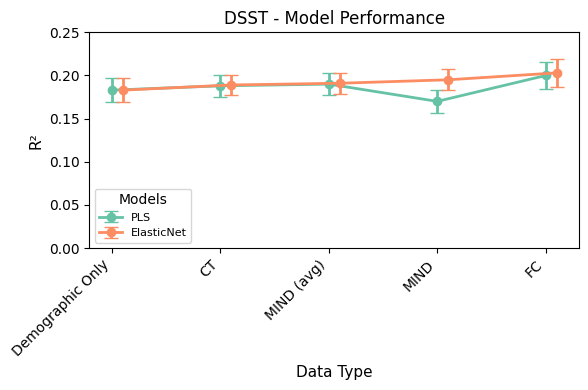

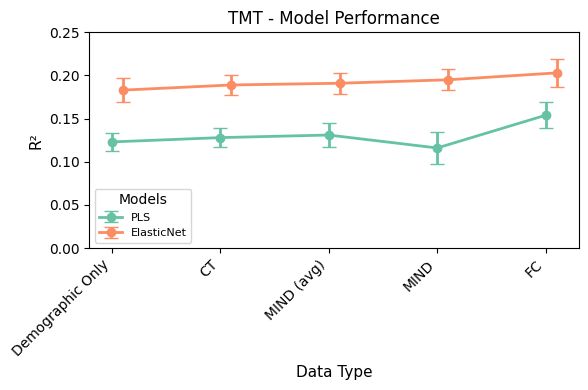

In [14]:
for sheet_name, df in sheets.items():
    plt.figure(figsize=(6, 4))

    data_order = ['Demographic Only', 'CT','MIND (avg)', 'MIND', 'FC']
    unique_models = df[model_col].unique()
    colors = plt.cm.Set2(range(len(unique_models)))

    base_positions = range(len(data_order))
    shift_amount = 0.1

    for i, model in enumerate(unique_models):
        model_df = df[df[model_col] == model]

        x_positions = []
        y_values = []
        y_errors = []

        shifted_position = [pos + i * shift_amount for pos in base_positions]

        for j, data_type in enumerate(data_order):
            row = model_df[model_df[data_col] == data_type]
            if not row.empty:
                x_positions.append(shifted_position[j])
                y_values.append(row[r2_col].iloc[0])
                y_errors.append(row[std_col].iloc[0])
            
        plt.errorbar(x_positions, y_values, yerr=y_errors,
                     label=model, color=colors[i], marker='o',
                     capsize=5, linewidth=2, markersize=6)
    
    plt.ylim(0, 0.25)
    plt.xlabel('Data Type', fontsize=11)
    plt.ylabel('R²', fontsize=11)
    plt.title(f'{sheet_name} - Model Performance', fontsize=12)
    plt.xticks(base_positions, data_order, rotation=45, ha='right', fontsize=10)
    plt.legend(title='Models', fontsize=8)

    plt.tight_layout()
    plt.show()